In [1]:
import pickle
import random
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

MAX_POLY = 30
PARTITION_COUNT = 10

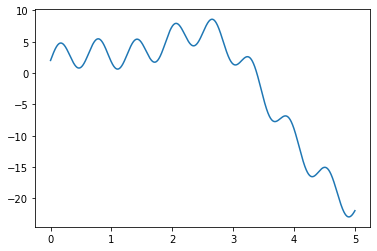

In [2]:
f = open("data.pkl", "rb")
raw = pickle.load(f)
plt.subplot()
plt.plot(raw[:,0], raw[:,1])
plt.show()
np.random.shuffle(raw)
plt.show()

In [3]:
training_size = len(raw) // 10 * 9
training_set = raw[:training_size]

test_set = raw[training_size:]

In [4]:
assert(len(training_set) + len(test_set) == len(raw))

In [5]:
partition_size = len(training_set) // PARTITION_COUNT
print(training_set[:5])

[[1.717      1.72488376]
 [2.812      5.74818753]
 [1.296      3.8197403 ]
 [3.292      2.23495127]
 [2.996      1.44040974]]


In [6]:
test_xs = test_set[:, :1]
test_ys = test_set[:, 1]

degree_vs_bias = np.zeros(shape=(MAX_POLY, 2))

for degree in range(1, MAX_POLY + 1):

    test_poly_xs = np.zeros(shape=(test_set.shape[0], degree))
    for row in range(test_set.shape[0]):
        test_poly_xs[row] = np.concatenate(
            list(test_xs[row] ** i for i in range(1, degree + 1))
        )

    predicted = np.zeros(shape=(test_set.shape[0], PARTITION_COUNT))

    for set_idx in range(PARTITION_COUNT):
        lo = set_idx * partition_size
        hi = (set_idx + 1) * partition_size

        cur_training = training_set[lo:hi]
        train_xs = cur_training[:, :1]
        train_ys = cur_training[:, 1]
        poly = np.zeros(shape=(cur_training.shape[0], degree))
        for row in range(cur_training.shape[0]):
            np.concatenate(
                list(train_xs[row] ** i for i in range(1, degree + 1)), out=poly[row]
            )

        model = linear_model.LinearRegression()

        model.fit(poly, train_ys)

        predicted[:, set_idx] = model.predict(test_poly_xs)
        


    expected_val = np.sum(predicted, axis=1) / PARTITION_COUNT
#     print(expected_val)
  
    assert expected_val.shape == test_ys.shape
    
    bias = np.sqrt(np.mean(((expected_val - test_ys) ** 2)))
    degree_vs_bias[degree - 1, 0] = bias
    
    
#     variance = np.mean(
#         np.mean(
#             (predicted - np.repeat(expected_val.reshape(500, 1), 10, axis=1)) ** 2,
#             axis=1,
#         )
#     )

    variance = np.mean(np.var(predicted, axis=1))
    degree_vs_bias[degree - 1, 1] = variance
#     print(
#         "degree {} bias = {} variance = {}".format(
#             degree, bias, variance
#         )
#     )

    print("\\hline")
    print("{} & {} & {} \\\\".format(degree, degree_vs_bias[degree - 1][0], variance))
    

\hline
1 & 5.464131704512534 & 0.12008903262331162 \\
\hline
2 & 2.5121206169079 & 0.031036522819443968 \\
\hline
3 & 2.3181478416596715 & 0.03244863769327444 \\
\hline
4 & 1.8233905422474666 & 0.029772903306991956 \\
\hline
5 & 1.7846691339933671 & 0.03085367912603323 \\
\hline
6 & 1.6620938867265127 & 0.02865202794673847 \\
\hline
7 & 1.6225378792483596 & 0.039238260295537876 \\
\hline
8 & 1.6157662185423798 & 0.04662776681775678 \\
\hline
9 & 1.6116822881097304 & 0.05158500587627507 \\
\hline
10 & 1.6053020140799634 & 0.054463163623915845 \\
\hline
11 & 1.565717460364102 & 0.04777882344783188 \\
\hline
12 & 1.5656894509275114 & 0.05469618269180888 \\
\hline
13 & 1.4839538177027038 & 0.05270522433583793 \\
\hline
14 & 1.4793097555630268 & 0.055130551004125505 \\
\hline
15 & 1.4792222770545063 & 0.05735393372164927 \\
\hline
16 & 1.478983827079377 & 0.059434124158177025 \\
\hline
17 & 1.4836025726559103 & 0.056106958016706655 \\
\hline
18 & 1.4916174856403124 & 0.056057885643917206 \\

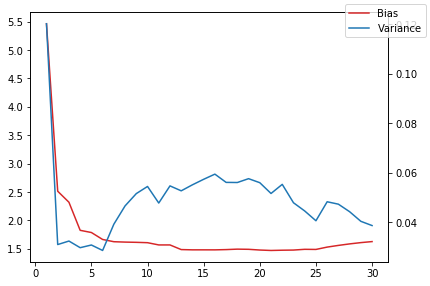

In [7]:
fig, ax1 = plt.subplots()

color = "tab:red"
ax1.plot(list(range(1, MAX_POLY + 1)), degree_vs_bias[:, 0], color=color, label="Bias")
color = "tab:blue"
ax2 = ax1.twinx()
ax2.plot(
    list(range(1, MAX_POLY + 1)), degree_vs_bias[:, 1], color=color, label="Variance"
)
fig.tight_layout()
fig.legend()
plt.show()

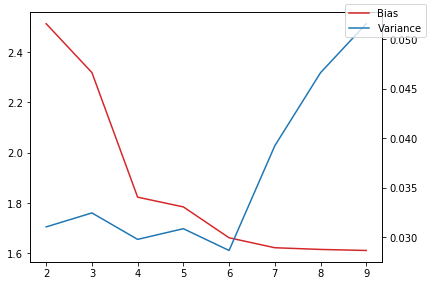

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(2, 10)), degree_vs_bias[:,0][1:9], color=color, label='Bias')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(2,10)), degree_vs_bias[:,1][1:9], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()

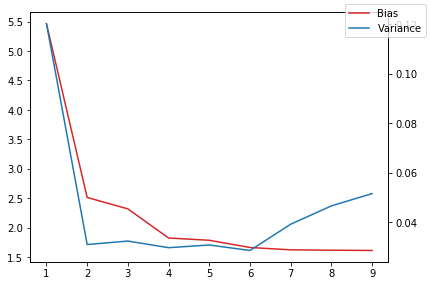

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(list(range(1, 10)), degree_vs_bias[:,0][0:9], color=color, label='Bias')
color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(list(range(1,10)), degree_vs_bias[:,1][0:9], color=color, label='Variance')
fig.tight_layout()
fig.legend()
plt.show()